In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cols
import matplotlib.cm as cm

SingleDim = 9
UNOCCUPIED = 0

board = np.zeros(shape=(SingleDim,SingleDim), dtype=int)
board[0,2] = 1
board[2,1] = 1

vacant = board == UNOCCUPIED
v_it = zip(*np.nonzero(vacant))

v_it = np.array(list(zip(*np.nonzero(vacant))))
v2 = v_it.copy()
np.random.shuffle(v2)
v2 = v2[:14]
v2[:,0], v2[:,1]

(array([5, 7, 4, 1, 1, 7, 7, 3, 6, 8, 3, 3, 7, 2]),
 array([1, 8, 8, 8, 1, 5, 3, 7, 6, 0, 3, 1, 6, 0]))

In [21]:
board[v2[:,0], v2[:,1]] = [7,2,3,4,5,6,7,2,3,4,5,6,1,1]

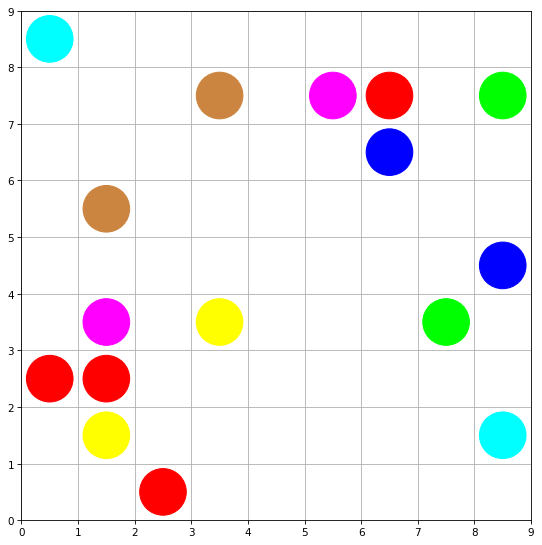

In [22]:
cmap = 'wrgybcm'
lines_cm = cols.ListedColormap([[1, 0, 0],
                               [0, 1, 0],
                               [0, 0, 1],
                               [0, 1, 1],
                               [1, 1, 0],
                               [1, 0, 1],
                               [.8,.52,.25]])

x,y = np.nonzero(board != UNOCCUPIED)
fig = plt.figure(figsize=(SingleDim,SingleDim), dpi=75)
ax = plt.subplot(111, aspect='equal', xlim=[0,SingleDim], ylim=[0,SingleDim], 
                 xticks=range(SingleDim+1), yticks=range(SingleDim+1))
#ax = plt.subplot(111, aspect='equal', xlim=[-0.5,SingleDim-0.5], ylim=[-0.5,SingleDim-0.5], 
#                 xticks=range(SingleDim), yticks=range(SingleDim))
ax.grid(True)
ax.scatter(y+0.5, x+0.5, s=2000, c=[board[x1,y1] for x1,y1 in zip(x,y)], 
           cmap=lines_cm)

In [23]:
from itertools import product
from dijkstar import Graph, find_path
graph = Graph()
for disp in [(1,0), (0,1), (-1,0), (0,-1)]:
    if disp[0] != 0 :
        row_plus = (1-disp[0])//2
    else:
        row_plus = 0
    if disp[1] != 0 :
        col_plus = (1-disp[1])//2
    else:
        col_plus = 0
    
    for r,c in product(range(row_plus, min(SingleDim,SingleDim-disp[0])), 
                       range(col_plus, min(SingleDim,SingleDim-disp[1]))):
        loc = (r,c)
        adj_loc = (loc[0]+disp[0],loc[1]+disp[1])
        graph.add_edge(loc, adj_loc, (loc,adj_loc))

path = find_path(graph, (0,0), (3,0), 
              cost_func=lambda u,v,e,pe: 0.001+int(board[v]!=UNOCCUPIED))

In [24]:
path

PathInfo(nodes=[(0, 0), (1, 0), (2, 0), (3, 0)], edges=[((0, 0), (1, 0)), ((1, 0), (2, 0)), ((2, 0), (3, 0))], costs=[0.001, 1.001, 0.001], total_cost=1.0029999999999997)

In [ ]:
def getLinesTransition(board, src, dst):
    